In [287]:
"""
Image name as {y}_{x}_{hue}_in_{filter}.eps
"""

'\nImage name as {y}_{x}_{hue}_in_{filter}.eps\n'

In [288]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [289]:

def all_average_plot(camera_positions, scenes, QPs, synthesizers, numGroups, pose_traces, numFrame):
    AdditiveSynthesizer_datas = []
    ViewWeightingSynthesizer_datas = []
    df = pd.DataFrame()
    df_tmp = pd.read_csv(f'./results/all.csv')
    df = df.append(df_tmp)

    ax_psnr = sns.barplot(x='QP', y='psnr_mean', data = df, capsize=.1)
    ax_psnr.set_title(f'Average PSNR')
    ax_psnr.set(xlabel="QP", ylabel="PSNR")
    ax_psnr.set(ylim=(30,50), yticks=[i for i in range(30,51,5)])
    plt.savefig('./img/all_psnr_average_in_QP.eps', dpi=300)
    plt.show()


In [290]:
def bitrate_plot(camera_positions, scenes, QPs, synthesizers, numGroups, pose_traces, numFrame):
    
    if not os.path.exists(f"./img"):
        os.system(f"mkdir ./img")
    if not os.path.exists(f"./img/bitrate"):
        os.system(f"mkdir ./img/bitrate")
    
    df = pd.DataFrame()
    df_tmp = pd.read_csv(f'./results/all.csv')
    df = df.append(df_tmp)

    # all pose trace use the same reference source
    fliter1 = (df["pose_traces"] == "pose0") 
    df = df[fliter1]
    filter2 = (df["QP"] == 20)
    df = df[filter2]
    df.to_csv(f"./test.csv", index=False)


    ax = sns.barplot(x='scene', y='bitrate', hue='camera_position', data = df)
    ax.set_title(f'Bitrate')
    ax.set(xlabel="", ylabel="bitrate")
    plt.xticks(rotation=60)
    plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
    plt.savefig('./img/bitrate_scene_camera_in_pose0_rec20.eps', dpi=300)
    plt.savefig('./img/bitrate_scene_camera_in_pose0_rec20.png', dpi=300)
    plt.show()

In [291]:
def quality_metrics_plot(camera_positions, scenes, QPs, synthesizers, numGroups, pose_traces, numFrame):
    
    if not os.path.exists(f"./img"):
        os.system(f"mkdir ./img")
    if not os.path.exists(f"./img/synthesizer"):
        os.system(f"mkdir ./img/synthesizer")
    

    df = pd.DataFrame()
    df_tmp = pd.read_csv(f'./results/all.csv')
    df = df.append(df_tmp)

    # all pose trace use the same reference source
    fliter1 = (df["QP"] == 20) 
    df_QP = df[fliter1]

    # all in one figure
    for metric in ['psnr', 'ssim', 'vmaf']:
        fliter2 = (df["camera_position"] != 'sphere_6x6') 
        df_QP = df[fliter2]
        df_QP.to_csv(f"./test.csv", index=False)

        ax = sns.barplot(x='synthesizer', y=f'{metric}_mean', hue='camera_position', data = df_QP)
        ax.set_title(f'{metric} in All')
        ax.set(xlabel="", ylabel=f"{metric}")
        # plt.xticks(rotation=60)
        plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
        plt.savefig(f'./img/synthesizer/{metric}_synthesizer_camera_position_rec20_all.eps', dpi=300)
        plt.savefig(f'./img/synthesizer/{metric}_synthesizer_camera_position_rec20_all.png', dpi=300)
        plt.show()
        plt.clf()
    
    # # based on synthesizer
    # for scene in scenes:
    #     for metric in ['psnr', 'ssim', 'vmaf']:
    #         filter2 = (df_QP["scene"] == scene)
    #         df_scene = df_QP[filter2]
    #         df_scene.to_csv(f"./test.csv", index=False)

    #         ax = sns.barplot(x='synthesizer', y=f'{metric}_mean', hue='camera_position', data = df_scene)
    #         ax.set_title(f'{metric} in {scene}')
    #         ax.set(xlabel="", ylabel=f"{metric}")
    #         # plt.xticks(rotation=60)
    #         plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
    #         plt.savefig(f'./img/synthesizer/{metric}_synthesizer_camera_position_rec20_{scene}.eps', dpi=300)
    #         plt.savefig(f'./img/synthesizer/{metric}_synthesizer_camera_position_rec20_{scene}.png', dpi=300)
    #         plt.show()
    #         plt.clf()

    # # based on camera position
    # for scene in scenes:
    #     for metric in ['psnr', 'ssim', 'vmaf']:
    #         filter2 = (df_QP["scene"] == scene)
    #         df_scene = df_QP[filter2]
    #         df_scene.to_csv(f"./test.csv", index=False)

    #         ax = sns.barplot(x='camera_position', y=f'{metric}_mean', hue='synthesizer', data = df_scene)
    #         ax.set_title(f'{metric} in {scene}')
    #         ax.set(xlabel="", ylabel=f"{metric}")
    #         # plt.xticks(rotation=60)
    #         plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
    #         plt.savefig(f'./img/synthesizer/{metric}_synthesizer_camera_position_rec20_{scene}.eps', dpi=300)
    #         plt.savefig(f'./img/synthesizer/{metric}_synthesizer_camera_position_rec20_{scene}.png', dpi=300)
    #         plt.show()
    #         plt.clf()

In [292]:
def arc_and_flat(camera_positions, scenes, QPs, synthesizers, numGroups, pose_traces, numFrame):
    
    if not os.path.exists(f"./img"):
        os.system(f"mkdir ./img")
    if not os.path.exists(f"./img/arc_and_flat"):
        os.system(f"mkdir ./img/arc_and_flat")
    

    df = pd.DataFrame()
    df_tmp = pd.read_csv(f'./results/all.csv')
    df = df.append(df_tmp)

    # all pose trace use the same reference source
    df_scene = df_camera_position = df.loc[(df["scene"] == 'RealisticRendering')]
    df_camera_position = df_scene.loc[(df_scene["camera_position"] == 'sphere_6x6') | (df_scene["camera_position"] == '6x6')]
    df_camera_position.to_csv(f"./test.csv", index=False)
    
    for metric in ['psnr', 'ssim', 'vmaf']:
        ax = sns.barplot(x='camera_position', y=f'{metric}_mean', data = df_camera_position)
        ax.set_title(f'{metric} in RealisticRendering')
        ax.set(xlabel="", ylabel=f"{metric}")
        # plt.xticks(rotation=60)
        plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
        plt.savefig(f'./img/arc_and_flat/{metric}_camera_position_arc_and_flat.eps', dpi=300)
        plt.savefig(f'./img/arc_and_flat/{metric}_camera_position_arc_and_flat.png', dpi=300)
        plt.show()
        plt.clf()
    
    for metric in ['psnr', 'ssim', 'vmaf']:
        ax = sns.barplot(x='camera_position', y=f'{metric}_mean', data = df_camera_position)
        ax.set_title(f'{metric} in RealisticRendering')
        ax.set(xlabel="", ylabel=f"{metric}")
        # plt.xticks(rotation=60)
        plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
        plt.savefig(f'./img/arc_and_flat/{metric}_camera_position_arc_and_flat.eps', dpi=300)
        plt.savefig(f'./img/arc_and_flat/{metric}_camera_position_arc_and_flat.png', dpi=300)
        plt.show()
        plt.clf()

In [293]:

def main():
    # setup paras
    # camera_positions = np.array(["6x6", "9x4", "12x3", "18x2"])
    # scenes = np.array(['ArchVizInterior', 'LightroomInteriorDayLight', 'office', 'RealisticRendering', 'XoioBerlinFlat'])
    # QPs = np.array([20, 36, 44, 48, 50])
    # synthesizers = np.array(["AdditiveSynthesizer", "ViewWeightingSynthesizer"])
    # numGroups = np.array([1])
    # pose_traces = np.array([f'pose{i}' for i in range(10)])
    # numFrame = 1

    # 1
    camera_positions = np.array(["6x6", "9x4", "12x3", "18x2"])
    scenes = np.array(['ArchVizInterior', 'LightroomInteriorDayLight', 'office', 'RealisticRendering', 'XoioBerlinFlat'])
    QPs = np.array([20, 36, 44, 48, 50])
    synthesizers = np.array(["AdditiveSynthesizer", "ViewWeightingSynthesizer"])
    numGroups = np.array([1])
    pose_traces = np.array([f'pose{i}' for i in range(10)])
    numFrame = 1

    # bitrate_plot(camera_positions, scenes, QPs, synthesizers, numGroups, pose_traces, numFrame)
    # quality_metrics_plot(camera_positions, scenes, QPs, synthesizers, numGroups, pose_traces, numFrame)
    arc_and_flat(camera_positions, scenes, QPs, synthesizers, numGroups, pose_traces, numFrame)

No handles with labels found to put in legend.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


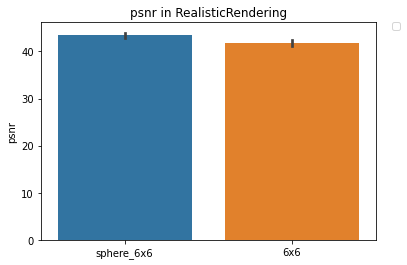

No handles with labels found to put in legend.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


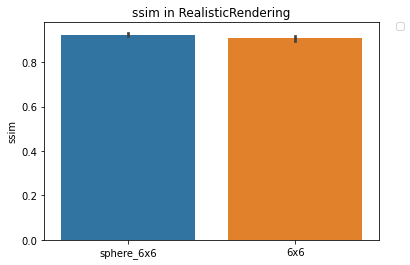

No handles with labels found to put in legend.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


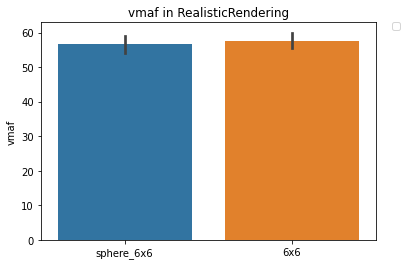

<Figure size 432x288 with 0 Axes>

In [294]:
if __name__ == '__main__':
    main()